This notebook was prepared with the help of DATAI Team Machine Learning Udemy Course and DATAI Team Machine Learning Tutorial for Beginners Notebook on Kaggle.

## K-NEAREST NEIGHBORS (KNN)
* The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.
* The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.
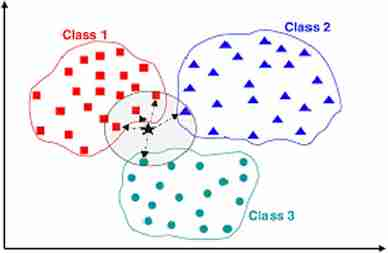
* Notice in the image above that most of the time, similar data points are close to each other. The KNN algorithm hinges on this assumption being true enough for the algorithm to be useful. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.

In [ ]:
# Import important libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Plot
from sklearn.model_selection import train_test_split # train test split
from sklearn.neighbors import KNeighborsClassifier # knn model

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data = pd.read_csv("/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv")
data.head()

In [ ]:
data["class"][::20]

* As you see, our output contains Normal and Abnormal observations
* We will convert Normal as 0, Abnormal as 1
* Let's Plot our data first

In [ ]:
A = data[data["class"] == "Abnormal"]
N = data[data["class"] == "Normal"]
# scatter plot
plt.scatter(A.sacral_slope,A.pelvic_incidence,color="red",label="kotu",alpha= 0.3)
plt.scatter(N.sacral_slope,N.pelvic_incidence,color="green",label="iyi",alpha= 0.3)
plt.xlabel("sacral_slope")
plt.ylabel("pelvic_incidence")
plt.legend()
plt.show()

In [ ]:
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
y = data["class"].values
x_data = data.drop(["class"],axis=1)

In [ ]:
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [ ]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

* First we need to train our data. Train = fit
* fit(): fits the data, train the data.
* predict(): predicts the data
* If you do not understand what is KNN, look at youtube there are videos like 4-5 minutes. You can understand better with it.
* Lets learn how to implement it with sklearn
* x: features
* y: target variables(normal, abnormal)
* n_neighbors: K. In this example it is 3. it means that Look at the 3 closest labeled data points

In [ ]:
# knn model
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" k = {} , score = {} ".format(3,knn.score(x_test,y_test)))

* Accuracy is 75.27% so is it good ?
* Now the question is why we choose K = 3 or what value we need to choose K.

* K has general name. It is called a hyperparameter. For now just know K is hyperparameter and we need to choose it that gives best performace.
* Literature says if k is small, model is complex model can lead to overfit. It means that model memorizes the train sets and cannot predict test set with good accuracy.
* If k is big, model that is less complex model can lead to underfit.
* Let's write the code that find better k value

In [ ]:
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

* It seems like the best k value is 13. Let's try.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 13) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" k = {} , score = {} ".format(13,knn.score(x_test,y_test)))

As you see, we find better k value with the simple optimization code. 